In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data['data'], columns = data['feature_names'])
df['target'] = data['target']

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [14]:
proportion = df[df.target == 0].target.value_counts(normalize=True)
labels = df.target.unique()

In [15]:
for label in labels:
    if label not in proportion.index:
        proportion.loc[label] = 0

In [32]:
(df.target.value_counts(normalize=True) ** 2).sum()

0.5324699392453075

In [25]:
def mean(x):
    return sum(x)/len(x)

def sqrt(number):
    return number**.5

def variance(x, df=0):
    m = mean(x)
    return sum([(point - m)**2 for point in x])/len(x)-df

def std(x, df=0):
    m = mean(x)
    return sqrt(variance(x, df=df))

def standard_error(x, df=0):
    return std(x, df=df)/sqrt(len(x))


In [28]:
standard_error(df['mean radius'])

0.14760593443135311

In [29]:
import numpy as np

In [30]:
nums = list(range(300))

In [56]:
sample = np.random.choice(nums, size=5000)

In [57]:
sample

array([  2,   1, 159, ..., 106, 201, 278])

In [38]:
pop = sorted(sample)

In [40]:
def median():
    

150.0

In [43]:
def partition(array, start, end):
    pivot = array[start]
    low = start + 1
    high = end

    while True:
        # If the current value we're looking at is larger than the pivot
        # it's in the right place (right side of pivot) and we can move left,
        # to the next element.
        # We also need to make sure we haven't surpassed the low pointer, since that
        # indicates we have already moved all the elements to their correct side of the pivot
        while low <= high and array[high] >= pivot:
            high = high - 1

        # Opposite process of the one above
        while low <= high and array[low] <= pivot:
            low = low + 1

        # We either found a value for both high and low that is out of order
        # or low is higher than high, in which case we exit the loop
        if low <= high:
            array[low], array[high] = array[high], array[low]
            # The loop continues
        else:
            # We exit out of the loop
            break

    array[start], array[high] = array[high], array[start]

    return high

def quick_sort(array, start, end):
    if start >= end:
        return

    p = partition(array, start, end)
    quick_sort(array, start, p-1)
    quick_sort(array, p+1, end)

In [58]:
partition(sample, 0, len(sample)-1)

30

In [59]:
sample

array([  1,   1,   0, ..., 106, 201, 278])

In [33]:
def _gini_index(group_indices, y):
    label_groups = [y.loc[index_group].value_counts(normalize=True) 
                    for index_group in group_indices]
    group_sizes = [len(group) for group in group_indices]
    total_size = sum(group_sizes)
    weighted_score = 0
    for idx in range(len(label_groups)):
        group_size = group_sizes[idx]
        if not group_size:
            continue 
        score = (label_groups[idx] ** 2).sum()
        weighted_score += (1-score) * (group_size/total_size)
    return weighted_score  

In [34]:
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
	# count all samples at split point
	n_instances = float(sum([len(group) for group in groups]))
	# sum weighted Gini index for each group
	gini = 0.0
	for group in groups:
		size = float(len(group))
		# avoid divide by zero
		if size == 0:
			continue
		score = 0.0
		# score the group based on the score for each class
		for class_val in classes:
			p = [row[-1] for row in group].count(class_val) / size
			score += p * p
		# weight the group score by its relative size
		gini += (1.0 - score) * (size / n_instances)
	return gini

Int64Index([ 21,  46,  59,  60,  61,  63,  66,  68,  71,  97, 101, 103, 104,
            110, 114, 116, 140, 151, 152, 175, 176, 185, 192, 206, 217, 222,
            226, 234, 245, 273, 303, 307, 314, 318, 320, 338, 341, 345, 358,
            359, 390, 391, 412, 416, 424, 425, 426, 459, 467, 470, 504, 505,
            520, 524, 525, 538, 539, 546, 547, 548, 553, 555, 556, 557, 568],
           dtype='int64')

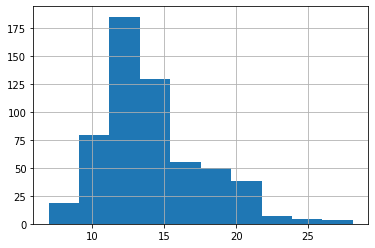

In [56]:
df['mean radius'].hist()

In [61]:
high = df[df['mean radius'] >= 10.5]
low  = df[df['mean radius'] < 10.5]
groups = [list(high.index), list(low.index)]


In [63]:
_gini_index(groups, y)

0.43172371467626297

In [85]:
def add_class_label(group):
    array = []
    for num in group:
        label = y.loc[num]
        array.append([num, label])
    return array

In [88]:
listed_groups = [add_class_label(group) for group in groups]

In [90]:
gini_index(listed_groups, [0,1])

0.43172371467626297

In [97]:
series = df['mean radius']

In [95]:
df.columns[0]

'mean radius'

In [98]:
df[series < 10.5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.029560,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.015880,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1
59,8.618,11.79,54.34,224.5,0.09752,0.05272,0.020610,0.007799,0.1683,0.07187,...,15.40,59.90,274.9,0.17330,0.12390,0.11680,0.04419,0.3220,0.09026,1
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.010840,0.012900,0.2743,0.06960,...,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020,1
61,8.598,20.98,54.66,221.8,0.12430,0.08963,0.030000,0.009259,0.1828,0.06757,...,27.04,62.06,273.9,0.16390,0.16980,0.09001,0.02778,0.2972,0.07712,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.012820,0.1692,0.06576,...,25.05,62.86,295.8,0.11030,0.08298,0.07993,0.02564,0.2435,0.07393,1
555,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.027380,0.1593,0.06127,...,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283,1
556,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.011160,0.1791,0.06331,...,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742,1
557,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.000000,0.1742,0.06059,...,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969,1


In [250]:
class MissingFeatureError(ValueError, AttributeError):
        pass

class DecisionTreeClassifier:
    def __init__(self, max_depth=100, min_size=3):
        self.max_depth = max_depth
        self.min_size = min_size
        self.required_features = set()
        self.isfit = False

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.labels = y.unique()
        root = self._get_split(X.index)
        self._split(root, self.max_depth, self.min_size, 1)
        self.tree = root
        self.isfit = True
        del self.X
        del self.y

    def predict(self, X):
        self._validate(X)
        predictions = []
        for idx in X.index:
            y_hat = self._descend_tree(tree.tree, X.loc[idx])
            predictions.append(y_hat)

        return predictions

    def _gini_index(self, group_indices):
        label_groups = [self.y.loc[index_group].value_counts(normalize=True) 
                        for index_group in group_indices]
        group_sizes = [len(group) for group in group_indices]
        total_size = sum(group_sizes)
        weighted_score = 0
        for idx in range(len(label_groups)):
            group_size = group_sizes[idx]
            if not group_size:
                continue 
            score = (label_groups[idx] ** 2).sum()
            weighted_score += (1-score) * (group_size/total_size)
        return weighted_score            

    def _pivot(self, dataset, series, pivot):
        left = dataset[series <= pivot].index
        right = dataset[series>pivot].index

        return left, right

    def _get_split(self, indices):
        X = self.X.loc[indices]
        unique  = [X[column].unique() for column in X.columns]
        total_columns = X.shape[1]
        groups = []
        best_score = None
        for idx in range(total_columns):
            column = X.columns[idx]
            for val in unique[idx]:
                left_split, right_split = self._pivot(X, X[column], val)
                gini_score = self._gini_index([left_split, right_split])
                if not best_score:
                    best_score = gini_score
                    best_column = column
                    best_val = val
                    best_split = (left_split, right_split)
                else:
                    if gini_score < best_score:
                        best_score = gini_score
                        best_column = column
                        best_val = val
                        best_split = (left_split, right_split)
                        
        self.required_features.add(best_column)
        
        return  {'column':best_column, 'split_value': best_val, 'score': best_score, 'split': best_split}

    def _to_terminal(self, split_indices):
        labels = self.y.loc[split_indices]

        return labels.value_counts().idxmax()

    def _split(self, node, max_depth, min_size, depth):
        left, right = node['split']
        del node['split']
        if not len(left) or not len(right):
            node['left'] = node['right'] = self._to_terminal(left.append(right))
            return
        if depth >= self.max_depth:
            node['left'], node['right'] = self._to_terminal(left), self._to_terminal(right)
            return
        if len(left) <= self.min_size:
            node['left'] = self._to_terminal(left)
        else:
            node['left'] = self._get_split(left)
            self._split(node['left'], max_depth, min_size, depth+1)
        if len(right) <= self.min_size:
            node['right'] = self._to_terminal(right)
        else:
            node['right'] = self._get_split(right)
            self._split(node['right'], max_depth, min_size, depth+1)

    def _descend_tree(self, node, row):
        if row[node['column']] <= node['split_value']:
            if isinstance(node['left'], dict):
                return self._descend_tree(node['left'], row)
            else:
                return node['left']

        else:
            if isinstance(node['right'], dict):
                return self._descend_tree(node['right'], row)
            else:
                return node['right']
            
    def _validate(self, X):
        for column in self.required_features:
            if column not in X.columns:
                raise MissingFeatureError(f'The following feature is required: {column}')


In [259]:
tree = DecisionTreeClassifier(max_depth=2)

tree.fit(df.drop('target', axis = 1), df.target)

In [260]:
tree.required_features

{'mean texture', 'worst concave points', 'worst radius'}

In [253]:
from sklearn.metrics import accuracy_score

In [261]:
accuracy_score(df.target, tree.predict(df.drop('target', axis = 1)))

0.9420035149384886

In [262]:
tree.isfit

True

In [240]:
df.drop('target', axis = 1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [207]:
x.add(2)

In [208]:
x.add(3)

In [209]:
x.add(3)

In [210]:
x

{2, 3}

In [212]:
5 in x

False

In [244]:
for column in ['column', 'mean radius']:
    if column in df.columns:
        print(2)

2
